In [671]:
import numpy as np 
import pandas as pd 
import os
from keras.models import Sequential 
from keras.layers import Flatten, Activation, Dense, Lambda,Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import os

#Referência https://www.kaggle.com/kshitizregmi/intel-image-classification/notebook

In [672]:
datagen = ImageDataGenerator(rescale=1./255)

In [673]:
import zipfile
with zipfile.ZipFile("dataset_projeto.zip","r") as zip_ref:
    zip_ref.extractall("dataset")

In [674]:
train_dir      = 'dataset/seg_train'
test_dir       = 'dataset/seg_test'
validation_dir = 'dataset/seg_pred'

In [675]:
train_generator = datagen.flow_from_directory(train_dir,
                                             target_size= (50,50),
                                             batch_size=20,
                                             shuffle=True,
                                             class_mode='categorical')

Found 14035 images belonging to 6 classes.


In [676]:
validation_generator = datagen.flow_from_directory(test_dir,
                                             target_size= (50,50),
                                             batch_size=20,
                                             class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [677]:
augmented_images = [train_generator[i][0][0] for i in range(5)]

In [678]:
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

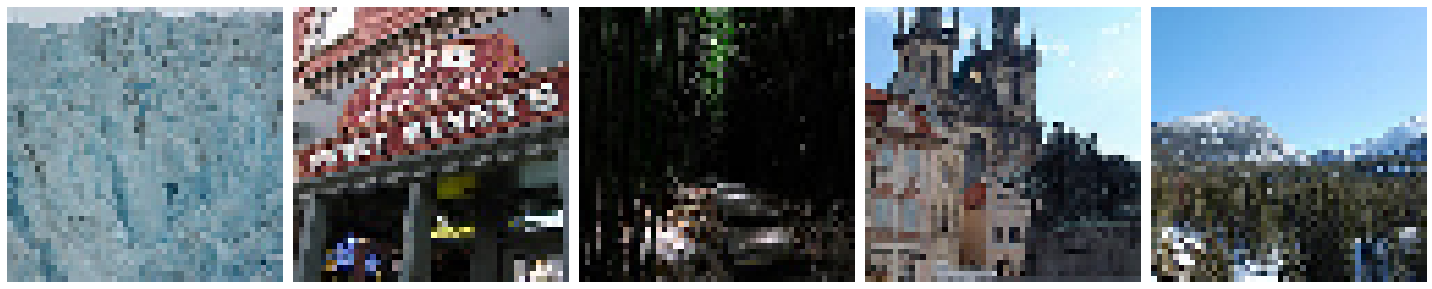

In [679]:
plotImages(augmented_images)

In [680]:
code = {"0":'edificios' ,"1":'floresta',"2": 'geleira',"3": 'montanha',"4":'mar',"5":'rua'}

In [681]:
'''
Quando usar um modelo sequencial:

Um Sequentialmodelo é apropriado para uma pilha simples de camadas 
onde cada camada tem exatamente um tensor de entrada e um tensor de saída .

----
Um modelo sequencial não é apropriado quando:

Seu modelo tem várias entradas ou várias saídas
Qualquer uma de suas camadas tem várias entradas ou várias saídas
Você precisa fazer o compartilhamento de camada
Você deseja uma topologia não linear (por exemplo, uma conexão residual, um modelo multiramal)
'''

def Modelo():
    model=Sequential()
    model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(50,50,3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=72,kernel_size=3,padding="same",activation="tanh"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(6,activation="softmax"))
    model.summary()
    return model

In [682]:
modelo = Modelo()

modelo.layers

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d_144 (MaxPoolin (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_145 (MaxPoolin (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_146 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 6, 6, 72)        

In [683]:
batch_size = train_generator.batch_size
batch_size

20

In [684]:

#learning rate = 0.03
#opt = keras.optimizers.Adam(learning_rate=0.01)
#função de perda
loss_fn = keras.losses.CategoricalCrossentropy()

# Instantiate an optimizer.
opt = tf.keras.optimizers.Adam()

modelo.compile(optimizer=opt,
             loss=loss_fn,
             metrics=['accuracy'])



In [685]:
train_sample = train_generator.samples
validation_sample = validation_generator.samples
# test_sample = test_generator.samples
steps_per_epoch = int(train_sample//batch_size)
validation_steps = int(validation_sample//batch_size)

In [ ]:
history = modelo.fit_generator(train_generator,
                    steps_per_epoch = steps_per_epoch,
                    epochs = 7,
                    validation_data = validation_generator,
                    validation_steps = validation_steps
                             )

Epoch 1/7
701/701 [==============================] - 26s 38ms/step - loss: 0.9996 - accuracy: 0.6120 - val_loss: 0.8211 - val_accuracy: 0.6843
Epoch 2/7
701/701 [==============================] - 27s 39ms/step - loss: 0.7138 - accuracy: 0.7354 - val_loss: 0.6263 - val_accuracy: 0.7780
Epoch 3/7
701/701 [==============================] - 27s 38ms/step - loss: 0.6004 - accuracy: 0.7830 - val_loss: 0.5927 - val_accuracy: 0.7963
Epoch 4/7
701/701 [==============================] - 34s 48ms/step - loss: 0.5214 - accuracy: 0.8133 - val_loss: 0.5538 - val_accuracy: 0.8050
Epoch 5/7
479/701 [===================>..........] - ETA: 10s - loss: 0.4651 - accuracy: 0.8332

In [ ]:
img = load_img('seg_train/sea/10061.jpg',target_size=(50,50))

In [ ]:
plt.imshow(lista[0])

In [ ]:

img = np.array(img)/255
img = img.reshape(1,50,50,3)
pred = modelo.predict(img)
np.argmax(pred)
p = str(np.argmax(pred))
print(code[p])


In [ ]:
load_img('seg_pred/10017.jpg',target_size=(128,128))

In [ ]:
img = load_img('seg_pred/10017.jpg',target_size=(50,50))
# plt.imshow(img)
img_numpy = np.array(img)/255
img_reshape = img_numpy.reshape(1,50,50,3)
pred = modelo.predict(img_reshape)
np.argmax(pred)
p = str(np.argmax(pred))
print(code[p])
plt.imshow(img)

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Prej

In [20]:
#####################################################################################################